In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from numpy.linalg import svd

In [2]:
with open('data/get_movies.pkl', 'rb') as f:
    t = pickle.load(f)
    
movie_dic = t[0]
movie_genre_dic = t[1]

with open('data/get_ratings.pkl', 'rb') as f:
    lst = pickle.load(f)

In [3]:
# load v here
v = np.load("matrices/abnormal_best_model_eta_0.009_reg_0.08_epoch_18_testerr_[0.91749443].matrix")

In [4]:
a, sigma, b = np.linalg.svd(v)
transformer = a[:, :2].T
transformed_v = np.matmul(transformer, v).T

# basic visualization time

Text(0.5,1,'10 random movies')

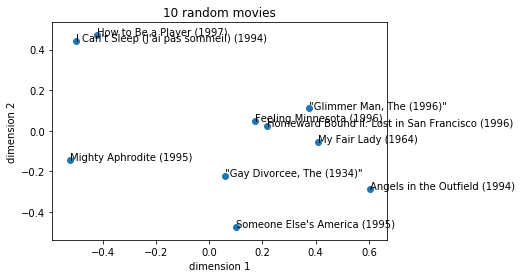

In [5]:
indices = np.random.randint(1682, size=10)
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]

plt.scatter(x,y)
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(movie_dic[indices[i]], (xi, yi))
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("10 random movies")

Text(0.5,1,'Top 10 most rated movies')

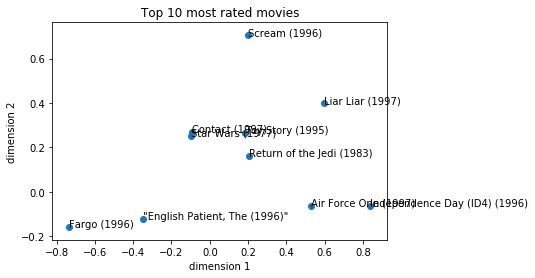

In [6]:
num_ratings_vs_movies = [0 for i in movie_dic.keys()]
for (i, j, yij) in lst:
    num_ratings_vs_movies[j] += 1
num_ratings_vs_movies = np.array(num_ratings_vs_movies)
indices = num_ratings_vs_movies.argsort()[-10:][::-1]
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]
plt.scatter(x,y)

for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(movie_dic[indices[i]], (xi, yi))
    
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("Top 10 most rated movies")

Text(0.5,1,'Top 10 movies with highest average rating')

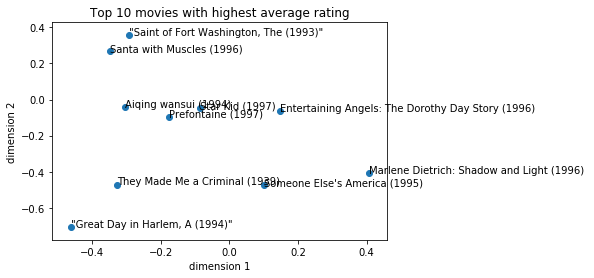

In [7]:
movie_rating_dic = {id: [] for id in movie_dic.keys()} # dic of movie id and ratings

for rating in lst:
    _, movie_id, r = rating
    movie_rating_dic[movie_id].append(r)

avg_ratings = {movie: sum(movie_rating_dic[movie]) / len(movie_rating_dic[movie]) \
               for movie in movie_rating_dic}

# get ten best movies that received highest average rating
top_10 = sorted(avg_ratings.items(), key=lambda tup: tup[1], reverse=True)[:10]
indices = [t[0] for t in top_10]
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]
plt.scatter(x,y)
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(movie_dic[indices[i]], (xi, yi))
    
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("Top 10 movies with highest average rating")

Text(0.5,1,'10 movies from Fantasy genre')

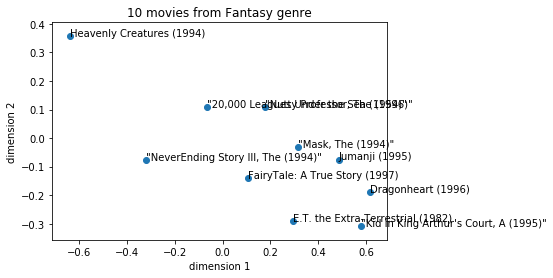

In [8]:
fant_movies = movie_genre_dic['Fantasy']
indices = fant_movies[:10]
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]
plt.scatter(x,y)

for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(movie_dic[indices[i]], (xi, yi))
    
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("10 movies from Fantasy genre")

[31, 47, 74, 114, 118, 319, 359, 633, 643, 644]


Text(0.5,1,'10 movies from Documentary genre')

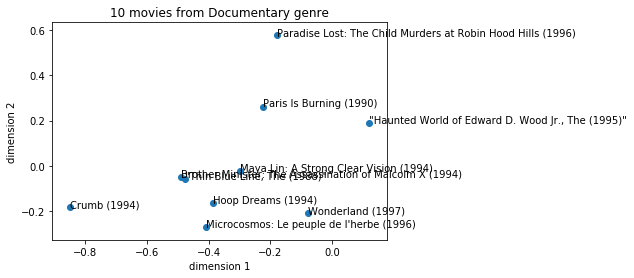

In [9]:
fant_movies = movie_genre_dic['Documentary']
indices = fant_movies[:10]
print(indices)
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]
plt.scatter(x,y)

for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(movie_dic[indices[i]], (xi, yi))
    
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("10 movies from Documentary genre")

Text(0.5,1,"10 movies from Children's genre")

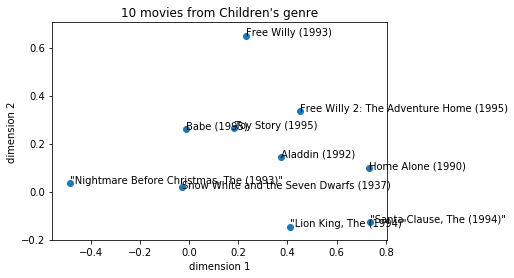

In [10]:
fant_movies = movie_genre_dic["Children's"]
indices = fant_movies[:10]
x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]
plt.scatter(x,y)

for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(movie_dic[indices[i]], (xi, yi))

plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("10 movies from Children's genre")

# more visualizations

Text(0,0.5,'dimension 2')

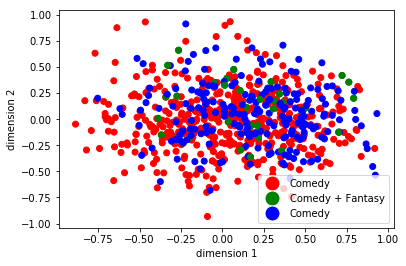

In [11]:
from matplotlib.lines import Line2D
# take two genres, see if the 'both' rated genres are closer to clusters
fant_movies = movie_genre_dic["Action"]
comedy_movies = movie_genre_dic["Comedy"]

x_comedies = [transformed_v[i][0] for i in comedy_movies]
y_comedies = [transformed_v[i][1] for i in comedy_movies]

x_fant = [transformed_v[i][0] for i in fant_movies]
y_fant = [transformed_v[i][1] for i in fant_movies]


colors = []
labels = []
for i in comedy_movies:
    if i not in fant_movies:
        colors.append('r')
        labels.append('Comedy')
    else:
        colors.append('g')
        labels.append('Comedy + Fantasy')
for i in fant_movies:
    if i not in comedy_movies:
        colors.append('b')
        labels.append('Fantasy')
    else:
        colors.append('g')
        labels.append('Comedy + Fantasy')


x = x_comedies + x_fant
y = y_comedies + y_fant

plt.scatter(x,y, c=colors)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Comedy',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Comedy + Fantasy',
                          markerfacecolor='g', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Comedy',
                          markerfacecolor='b', markersize=15)]
plt.legend(handles=legend_elements, loc='best')
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")

Text(0,0.5,'dimension 2')

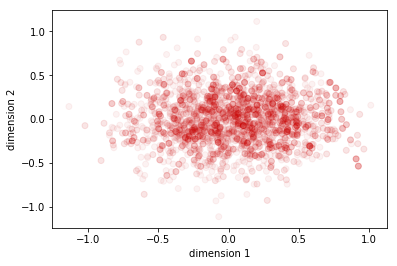

In [12]:
# color all points, make density equal to number of genres the movie is in
# gets informatino about how "generic" a movie is
genre =  ['Unknown', 'Action', 'Adventure', 'Animation',
           "Children's", 'Comedy', 'Crime', 'Documentary',
           'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
           'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
           'Thriller', 'War', 'Western']

genre_density = [0 for i in range(len(movie_dic))]
for i in range(len(movie_dic)):
    for g in genre:
        if i in movie_genre_dic[g]:
            genre_density[i] += 1

x = [transformed_v[i][0] for i in range(len(genre_density))]
y = [transformed_v[i][1] for i in range(len(genre_density))]

rgba_colors = np.zeros((len(genre_density),4))
rgba_colors[:,0] = 0.8
densities = []
for i in genre_density:
    if i == 1:
        densities.append(0.05)
    elif i == 2:
        densities.append(0.1)
    elif i == 3:
        densities.append(0.2)
    elif i == 4:
        densities.append(0.3)
    elif i == 5:
        densities.append(0.4)
    elif i == 6:
        densities.append(0.5)
    elif i == 7:
        densities.append(0.6)
    elif i == 8:
        densities.append(0.7)
    elif i == 9:
        densities.append(0.8)
    elif i == 10:
        densities.append(0.9)
    else:
        densities.append(1)

rgba_colors[:, 3] = densities
plt.scatter(x, y, color=rgba_colors)
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")

Text(0,0.5,'dimension 2')

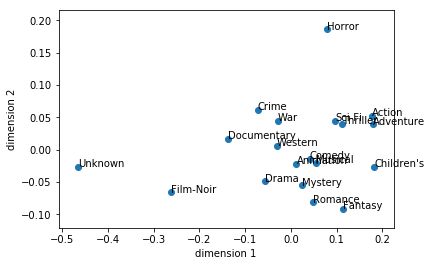

In [13]:
# see how related the genres are in the embedding space
# gets information about the movie genres
centers_x = []
centers_y = []
for g in genre:
    indices = movie_genre_dic[g]
    temp_x = np.array([transformed_v[i][0] for i in indices])
    temp_y = np.array([transformed_v[i][1] for i in indices])
    
    centers_x.append(np.mean(temp_x))
    centers_y.append(np.mean(temp_y))
    
plt.scatter(centers_x,centers_y)
for i, (xi, yi) in enumerate(zip(centers_x, centers_y)):
    plt.annotate(genre[i], (xi, yi))

plt.xlabel("dimension 1")
plt.ylabel("dimension 2")

Text(0,0.5,'dimension 2')

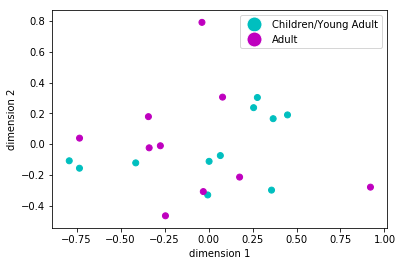

In [14]:
# compare age groups

children_indices = [99, 132, 420, 1, 383, 398, 380, 427, 207, 231, 1442]
adult_indices = [156, 177, 179, 318, 902, 29, 405, 852, 219, 82]
indices = children_indices + adult_indices

x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]



colors = []
for i in children_indices:
    colors.append('c')
    
for i in adult_indices:
    colors.append('m')


plt.scatter(x,y, c=colors)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Children/Young Adult',
                          markerfacecolor='c', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Adult',
                          markerfacecolor='m', markersize=15)]
plt.legend(handles=legend_elements, loc='best')
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")


Text(0,0.5,'dimension 2')

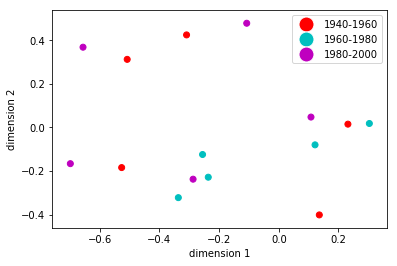

In [15]:
# movies style change over time, so we take a few samples from different time periods and 
# try to see how well the embeddings capture these cultural differences in time periods

period_1 = [968, 1020, 1050, 1064, 1116]
period_2 = [945, 1123, 429, 434, 488]
period_3 = [951, 2, 22, 64, 67]

indices = period_1 + period_2 + period_3

x = [transformed_v[i][0] for i in indices]
y = [transformed_v[i][1] for i in indices]



colors = []
for i in period_1:
    colors.append('r')
    
for i in period_2:
    colors.append('c')

for i in period_3:
    colors.append('m')

plt.scatter(x,y, c=colors)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='1940-1960',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='1960-1980',
                          markerfacecolor='c', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='1980-2000',
                          markerfacecolor='m', markersize=15)]
plt.legend(handles=legend_elements, loc='best')
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")